In [1]:
import sys
sys.path.append('/home/grad3/hle/sargan')
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from cifar_helper import chunks
from sar_utilities import add_gaussian_noise
from sargan_models import SARGAN
import tensorflow as tf

# NOISE_STD = [0.1,0.3]
NOISE_STD = 0.07
BATCH_SIZE = 50
import sklearn.preprocessing as preprocessing
import cifar10_input

with open('config.json') as config_file:
    config = json.load(config_file)
cifar = cifar10_input.CIFAR10Data(config['data_path'])
xs = cifar.eval_data.xs
x_batches = np.array(list(chunks(xs, BATCH_SIZE)))
recover_path = config['store_adv_recover_path']


# params to recover the trained model
img_size = (32,32,3)
DATA_PATH = "/scratch/hle/data/"
model_trained_epoch = 2
model_path_test = os.path.join(DATA_PATH,
                               "trained_models/cifar_10_gaussian_corrupted/",
                               "cifar_10_gaussian_corrupted_model_{}.ckpt".format(model_trained_epoch))
model = SARGAN(img_size, BATCH_SIZE, img_channel=3)
saver = tf.train.Saver()

# tensorflow config
gpu = "3"
gpu_options = tf.GPUOptions(allow_growth=True, visible_device_list=gpu)
config=tf.ConfigProto(gpu_options=gpu_options)

recovered = []
with tf.Session(config=config) as sess:
    saver.restore(sess, model_path_test)
    for i in range(200):
        #get 1 batch of size BATCH_SIZE and then corrupt it
        batch = x_batches[i]
        batch = [image/255 for image in batch]
#         print("batch range %s, %s" % (np.amax(batch), np.amin(batch)))
        corrupted_batch = np.array([add_gaussian_noise(image, sd=NOISE_STD) for image in batch])
#         print("corrupted batch range %s, %s" % (np.amax(corrupted_batch), np.amin(corrupted_batch)))
        gen_imgs = sess.run(model.gen_img, feed_dict={model.image:batch, model.cond:corrupted_batch})
#         print("recovered batch range %s, %s" % (np.amax(gen_imgs), np.amin(gen_imgs)))
#         scaled_up = [img.clip(min=0,max=1) for img in gen_imgs]
#         scaled_up = [ (img*255).astype(np.uint8) for img in scaled_up]
        scaled_up = np.array([(255*(image-image.min())/(image.max()-image.min())).astype(np.uint8) for image in gen_imgs])
#         print("scaled up batch range %s, %s" % (np.amax(scaled_up), np.amin(scaled_up)))

        recovered.append(scaled_up)
        
        
#         fig=plt.figure(figsize=(10, 80))
#         columns = 4
#         rows = 50
#         j = 1
#         for k in range(50):
#             fig.add_subplot(rows, columns, j)
#             img = batch[k]
#             plt.imshow(img)
#             j+=1
#             fig.add_subplot(rows, columns, j)
#             corrupted_img = corrupted_batch[k]
#             plt.imshow(corrupted_img)
#             j+=1
#             fig.add_subplot(rows, columns, j)
#             recovered_img = gen_imgs[k]
#             plt.imshow(recovered_img)
#             j+=1
#             fig.add_subplot(rows, columns, j)
#             scaledup_img = scaled_up[k]
#             plt.imshow(scaledup_img)
#             j+=1
#         plt.show()
        if i%10 == 0:
            print("recover batch %s finished" % i)

    

    
    recovered = np.concatenate(recovered, axis=0)
    np.save(recover_path, recovered)
    print('Examples stored in {}'.format(recover_path))


/scratch/hle/conda_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/scratch/hle/conda_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/scratch/hle/conda_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/scratch/hle/conda_env/lib/python3.6/site-packages/tensorflow/python/framework/dty




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /scratch/hle/data/trained_models/cifar_10_gaussian_corrupted/cifar_10_gaussian_corrupted_model_2.ckpt
recover batch 0 finished
recover batch 10 finished
recover batch 20 finished
recover batch 30 finished
recover batch 40 finished
recover batch 50 finished
recover batch 60 finished
recover batch 70 finished
recover batch 80 finished
recover batch 90 finished
recover batch 100 finished
recover batch 110 finished
recover batch 120 finished
recover batch 130 finished
recover batch 140 finished
recover batch 150 finished
recover batch 160 finished
recover batch 170 finished
recover batch 180 finished
recover batch 190 finished
Examples stored in natural_

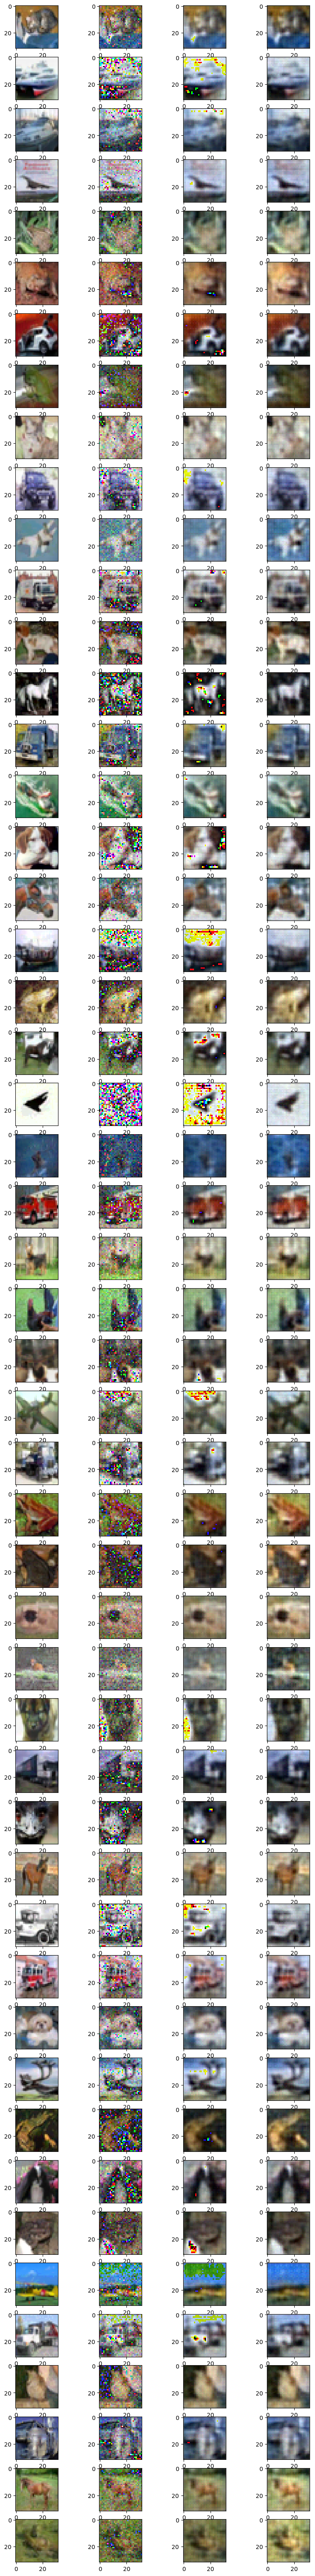

In [2]:
fig
# x = gen_imgs[0]
# print(x.max(), x.min())

# y = (x - x.min())/(x.max()-x.min())
# # y = x.clip(max=1, min=0)
# # y = y*255
# print(y.max(), y.min())
# plt.imshow(y)

(10000, 32, 32, 3)
255.0 0.0


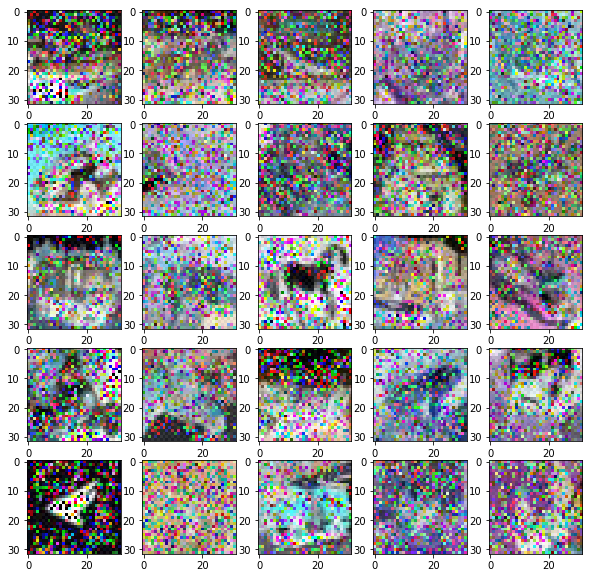

In [5]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import json

with open('config.json') as config_file:
    config = json.load(config_file)

x_recovered = np.load(config['store_adv_path'])
print(x_recovered.shape)
# x_recovered = np.array([img/255 for img in x_recovered])
# x_recovered = np.array([(img).astype(np.uint8) for img in x_recovered])
# print(x_recovered.dtype)
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5
print(np.amax(x_recovered), np.amin(x_recovered))
for i in range(1, 26,1):
    fig.add_subplot(rows, columns, i)
    img = x_recovered[i]
    plt.imshow(img)

plt.show()
# from PIL import Image
# image = x_recovered[0][:,:,0]
# f = np.fft.fft2(image)
# fourier = np.fft.fftshift(f)
# fourier = abs(fourier)
# fourier = np.log10(fourier)
# lowest = np.nanmin(fourier[np.isfinite(fourier)])
# highest = np.nanmax(fourier[np.isfinite(fourier)])
# orig_range = highest - lowest
# norm_fourier = (fourier - lowest)/ orig_range * 255
# norm_fourier_img = norm_fourier
# fig = plt.figure()
# ax1 = fig.add_subplot(221)
# ax2 = fig.add_subplot(222)
# ax1.imshow(image)
# ax2.imshow(norm_fourier_img)
# x_recovered = np.load(config['store_adv_recover_path'])

# image = x_recovered[0][:,:,0]
# f = np.fft.fft2(image)
# fourier = np.fft.fftshift(f)
# fourier = abs(fourier)
# fourier = np.log10(fourier)
# lowest = np.nanmin(fourier[np.isfinite(fourier)])
# highest = np.nanmax(fourier[np.isfinite(fourier)])
# orig_range = highest - lowest
# norm_fourier = (fourier - lowest)/ orig_range * 255
# norm_fourier_img2 = norm_fourier
# ax1 = fig.add_subplot(223)
# ax2 = fig.add_subplot(224)
# ax1.imshow(image)
# ax2.imshow(norm_fourier_img2)
# plt.show()

